# IFT 4030 / 7030, Machine Learning for Signal Processing, Lab 3

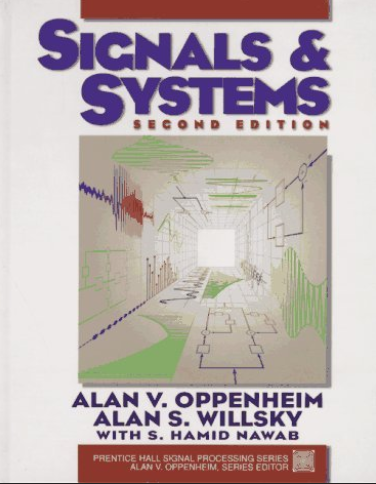

In this lab we will cover material from lecture 3. You will be asked questions related to the material we covered during the lecture.

This lab counts 1% towards your final grade. Each question will be graded in a binary way. If the code works, and follows the requirements you will get full credit, if not no credit will be given. If you are above 50%, you get full points for the whole lab, if below, you will only leave with what you learn. (if you are below 50%, you will get 0% towards your final grade)

This is supposed to individual work. So you are not supposed to collaborate with other students, or copy other people's code. It's okay to talk with others for ideas, but you are supposed write your code individually.

You can use pytorch or numpy.

If you do not have a google (gmail) account, you will not be able run the cells. So get one! Also, make sure you create a local copy, so that you can save your work, and then you can upload your work on teams. After you are happy with your work, upload your work on 'Lab 3' in teams. Have a nice lab!

-----------------------

Dans ce laboratoire, nous couvrirons le matériel du cours 3. Questions vous seront posées liées au matériel que nous avons couvert pendant le cours.

Ce laboratoire compte 1 % dans votre note finale. Chaque question sera notée de manière binaire. Si le code fonctionne et respecte les exigences, vous obtiendrez l'intégralité du crédit, sinon aucun crédit ne sera accordé. Si vous êtes au dessus de 50%, vous obtenez la totalité des points pour l'ensemble du laboratoire, si en dessous, vous ne repartirez qu'avec ce que vous avez appris. (Si vous êtes en dessous de 50%, vous obtiendrez 0% vers votre note finale)

Ceci est censé être un travail individuel. Vous n’êtes donc pas censé collaborer avec d’autres étudiants ni copier le code d’autres personnes. C'est bien de discuter avec les autres pour trouver des idées, mais vous êtes censé écrire votre code individuellement.

Vous pouvez utiliser pytorch ou numpy.

Si vous n'avez pas de compte google (gmail), vous ne pourrez pas exécuter les cellules. Alors obtenez-en un! Assurez-vous également de créer une copie locale, afin de pouvoir enregistrer votre travail, puis de télécharger votre travail sur Teams. Une fois que vous êtes satisfait de votre travail, téléchargez votre travail sur 'Lab 3' en teams. Je vous souhaite un beau laboratoire!

# Q1 Convolution

## Q1.a Convolution in the Time Domain (15pt)

Take two discrete signals $a = [1, 1, 1, 1]$, $b =[1, 1, 1]$, and convolve them in the time domain such that such that $c=a*b$. (Do not use a function from a library, you need to implement the convolution yourself) Implement the convolution yourself with a function since you'll re-using it.

Note that the result should be of length 6. (Remember the output of convolution for discrete signals is $M + N - 1$, where $M, N$ are the lengths of $a$ and $b$). Show the result in a 1x3 subplot (use plt.stem() for a, b and c)

Hint: Remember that time domain circular convolution can be implemented as matrix multiplication between a circulant matrix and a vector. If you prefer to do it this way, do not forget to pad both signals with 0s at the end.


# Q1 . Convolution

## Q1.a Convolution dans le domaine temporel (15pt)

Prenez deux signaux discrets $a = [1, 1, 1, 1]$, $b =[1, 1, 1]$ et convolutionnez-les dans le domaine temporel de telle sorte que $c=a*b$. (N'utilisez pas une fonction d'une bibliothèque, vous devez implémenter la convolution vous-même) Implémentez vous-même la convolution avec une fonction puisque vous la réutiliserez.

Notez que le résultat doit être de longueur 6. (N'oubliez pas que la sortie de convolution pour les signaux discrets est $M + N - 1$, où $M, N$ sont les longueurs de $a$ et $b$). Afficher le résultat dans un sous-tracé 1x3 (utilisez plt.stem() pour a, b et c)

Astuce : rappelez-vous que la convolution circulaire dans le domaine temporel peut être implémentée sous forme de multiplication matricielle entre une matrice circulante et un vecteur. Si vous préférez procéder de cette façon, n'oubliez pas de compléter les deux signaux avec des 0 à la fin

[1, 2, 3, 3, 2, 1]


<StemContainer object of 3 artists>

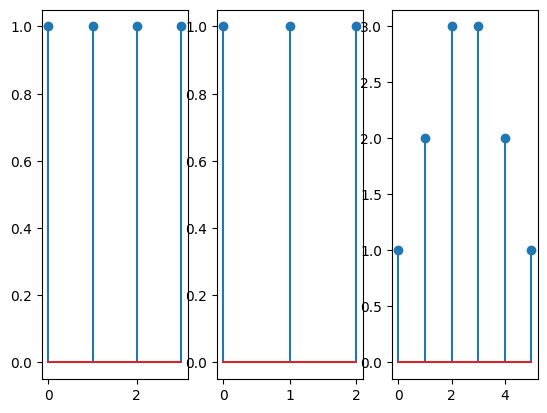

In [19]:

import torch.nn.functional as F
import torch
import scipy.linalg as spl
import numpy as np
import matplotlib.pyplot as plt

def convolve(a, b):
  # implement time-dom conv here.
  # implementez time-dom conv ici.
  c = [0]*(len(a)+len(b)-1)
  for i in range(len(a)):
    for j  in range(len(b)):
      c[i+j] += a[i]*b[j]
  return c


a = [1, 1, 1, 1]
b = [1, 1, 1]

c = convolve(a, b)
print(c)

plt.subplot(131)
plt.stem(a)

plt.subplot(132)
plt.stem(b)

plt.subplot(133)
plt.stem(c)



## Q1.b Convolution in the Frequency Domain (15pt)

As we talked about it, convolution in the time domain is equal to multiplication in the frequency domain. For the same signals $a$, $b$ implement the convolution operation as multiplication in the frequency domain. Then go back to time domain by calculating the inverse Fourier transform. Namely, implement, $$  c= F^{-1}(Fa \odot Fb)$$

## Q1.b Convolution dans le domaine fréquentiel (15pt)

Comme nous en avons parlé, la convolution dans le domaine temporel est égale à la multiplication dans le domaine fréquentiel. Pour les mêmes signaux $a$, $b$ implémentent l'opération de convolution comme multiplication dans le domaine fréquentiel. Revenez ensuite au domaine temporel en calculant la transformée de Fourier inverse. C'est à dire, implémentez, $$ c= F^{-1}(Fa \odot Fb)$$


[1. 2. 3. 3. 2. 1.]


<StemContainer object of 3 artists>

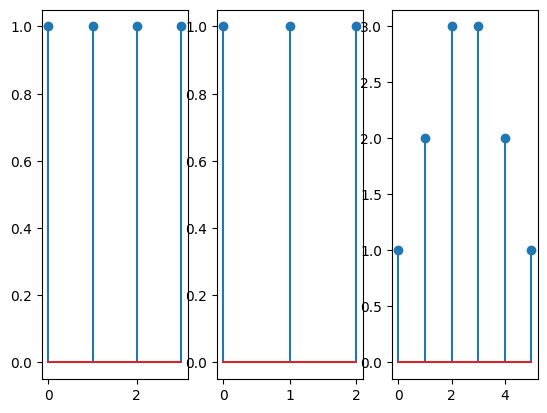

In [20]:
def convolve_viaDFT(a, b):
  # implement freq-dom convolution here
  # implementez freq-dom convolution ici
  A = np.fft.fft(a, len(a)+len(b)-1)
  B = np.fft.fft(b, len(a)+len(b)-1)
  c = np.fft.ifft(A*B).real

  return c

c = convolve_viaDFT(a, b)
print(c)

plt.subplot(131)
plt.stem(a)

plt.subplot(132)
plt.stem(b)

plt.subplot(133)
plt.stem(c)



## Q1.c Central Limit Theorem via Convolution (15pt + 10 pt (bonus))

What if we keep convolving the convolution result $c$ with $b$ ? Namely, what if we define a process such that,

$c_{n+1} = c_n * b$. You can use $c_0 = a$. Plot the results for $n =1, 2, 3, 4, 10, 20, 100$. Does this look like something we have seen in the class? Do you see a connection with the Central Limit Theorem? https://en.wikipedia.org/wiki/Central_limit_theorem (bonus of 10 pt if you can explain the connection)

Use $b = [1/3, 1/3, 1/3]$ so that results do not explode.  

## Q1.c Théorème central limite via convolution (15pt + 10 pt (bonus))

Qu'est-ce qu'on aurait si nous continuions à convoluer le résultat de la convolution $c$ avec $b$ ? À savoir, que se passe-t-il si nous définissons un processus tel que,

$c_{n+1} = c_n * b$. Vous pouvez utiliser $c_0 = a$. Tracez les résultats pour $n =1, 2, 3, 4, 10, 20, 100$. Est-ce que cela ressemble à quelque chose que nous avons vu en classe ? Voyez-vous un lien avec le théorème central limite ? https://en.wikipedia.org/wiki/Central_limit_theorem (bonus de 10 pt si vous pouvez expliquer le lien)

Utilisez $b = [1/3, 1/3, 1/3]$ pour que les résultats n'explosent pas.



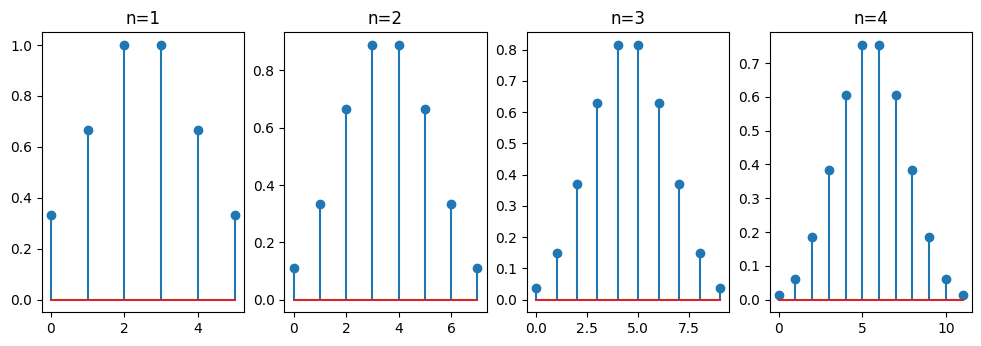

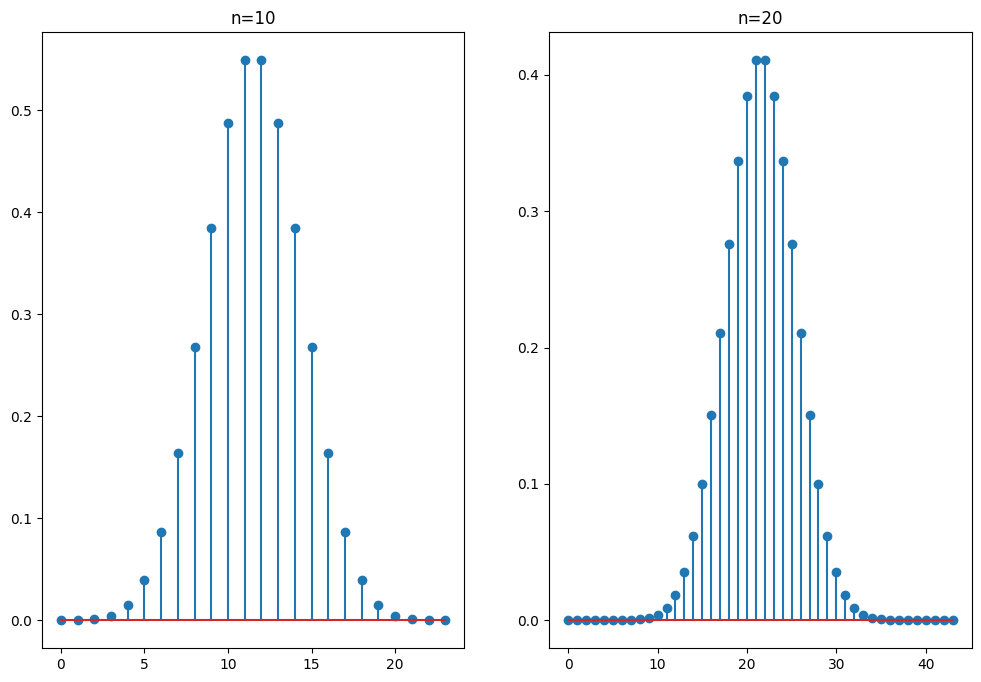

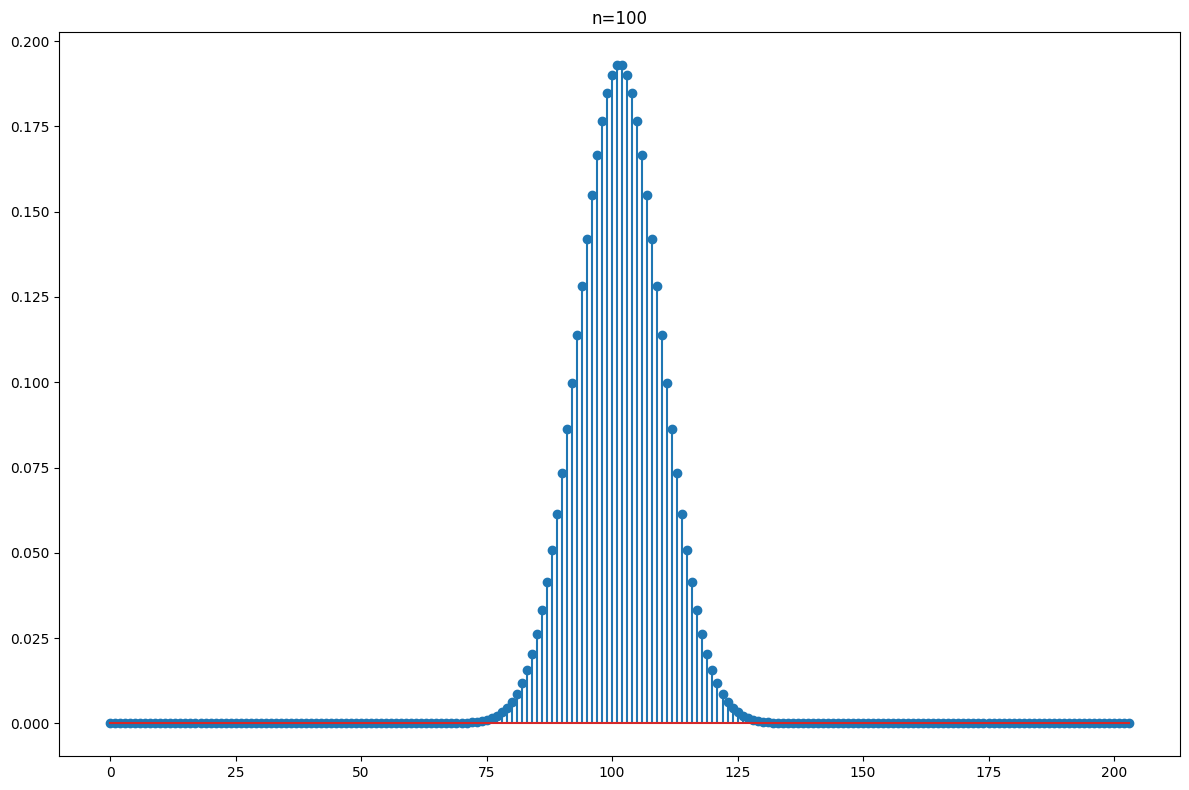

In [21]:
# do your work here
# travaillez ici
c_0 = a
b= [1/3, 1/3, 1/3]

def calcule_c(n):
    c=c_0
    for i in range(n):
        c = convolve(c, b)
    return c

c_1 = calcule_c(1)
c_2 = calcule_c(2)
c_3 = calcule_c(3)
c_4 = calcule_c(4)
c_10 = calcule_c(10)
c_20 = calcule_c(20)
c_100 = calcule_c(100)

plt.figure(figsize=(12, 8))

plt.subplot(2, 4, 1)
plt.stem(c_1)
plt.title('n=1')

plt.subplot(2, 4, 2)
plt.stem(c_2)
plt.title('n=2')

plt.subplot(2, 4, 3)
plt.stem(c_3)
plt.title('n=3')

plt.subplot(2, 4, 4)
plt.stem(c_4)
plt.title('n=4')

plt.figure(figsize=(12, 8))

plt.subplot(1, 2, 1)
plt.stem(c_10)
plt.title('n=10')

plt.subplot(1, 2, 2)
plt.stem(c_20)
plt.title('n=20')

plt.figure(figsize=(12, 8))

plt.subplot(1, 1, 1)
plt.stem(c_100)
plt.title('n=100')

plt.tight_layout()
plt.show()



# Reponse aux questions

On remarque que au fur et à mesure qu'on fait la convolusion $ c_n $ suit une distribution normale;

Le théorème central limite (TCL) stipule que la somme de plusieurs variables aléatoires indépendantes et identiquement distribuées tend vers une distribution normale, même si la distribution initiale des variables n’est pas normale. Cela est vrai à mesure que le nombre de variables augmente.

Vu que la multiplication est une forme d'addition, à mesure que nous convoluez $c_n$ avec $b$. Le résultat final de la distribution $c_n$, au fur et à mesure que $n$ devient grand, converge vers une distribution normale, quel que soit $a$.


# Q2. Convolve and Deconvolve Data

In this question, we will work with images, explore convolution and deconvolution. Take the image of data, and convolve with a Gaussian blurring kernel. (Similar to Slide 51 of lecture 3)

## Q2a. Obtain the Gaussian blurring kernel and convolve (15 pt)

Obtain a 2D Gaussian blurring kernel $h(x,y)$ such that,

$h(x, y) = \exp( -\frac{x^2 + y^2}{\sigma^2})$, and set $\sigma = 10$.

Hint: You can use `np.meshgrid()` to create the domain on which this blurring kernel can be evaluated. For both axes, use a grid that goes from -10 to 10, and get 21x21 kernel.

Then you can use `scipy.signal.convolve2d()` to convolve the image with this kernel, such that $y= x *h$, where $x$ is the input image, and $h$ is the blurring kernel.

# Q2. Convolution et déconvolution des données

Dans cette question, nous travaillerons avec des images, explorerons la convolution et la déconvolution. Prenez l'image des données et convoluez avec un noyau de flou gaussien. (Similaire à la diapositive 51 du cours 3)

## Q2a. Obtenir le noyau de flou gaussien et convoluer (15 pt)

Obtenir un noyau de flou gaussien 2D $h(x,y)$ tel que,

$h(x, y) = \exp( -\frac{x^2 + y^2}{\sigma^2})$, et définissez $\sigma = 10$.

Astuce : Vous pouvez utiliser `np.meshgrid()` pour créer le domaine sur lequel ce noyau flou peut être évalué. Pour les deux axes, utilisez une grille qui va de -10 à 10, et obtenez un noyau 21x21.

Ensuite, vous pouvez utiliser `scipy.signal.convolve2d()` pour convoluer l'image avec ce noyau, tel que $y= x *h$, où $x$ est l'image d'entrée et $h$ est le noyau flou.







'wget' n'est pas reconnu en tant que commande interne
ou externe, un programme ex�cutable ou un fichier de commandes.


Text(0.5, 1.0, 'Image floutée')

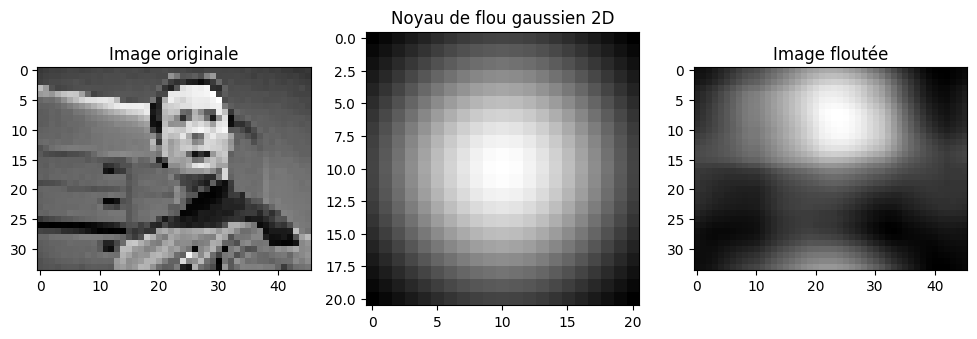

In [22]:
!wget https://sourceseparationresearch.com/static/mlsp_data/data.png
import torchvision
import scipy.signal as sps

out = torchvision.io.read_image('data.png')
im = out[:, ::20, ::20].permute(1, 2, 0).float()

im = im.mean(-1)
im = im / im.max()

sigma = 10

# travaillez ici
# work here
axe_x = np.linspace(-10, 10, 21)
axe_y = np.linspace(-10, 10, 21)
x,y = np.meshgrid(axe_x, axe_y)

h= np.exp(-(x**2+y**2)/sigma**2) 
h = h / h.sum()

plt.figure(figsize=(12, 8))

plt.subplot(131)
plt.imshow(im, cmap='gray')
plt.title("Image originale")

plt.subplot(132)
plt.imshow(h, cmap='gray')
plt.title("Noyau de flou gaussien 2D")

plt.subplot(133)
y = sps.convolve2d(im.numpy(), h, mode='same',boundary="wrap")
plt.imshow(y, cmap='gray')
plt.title("Image floutée")

## Q2b. Deconvolve via the frequency domain (15pt)

Deconvolve data such that $$\widehat x = \mathcal F^{-1} ( \frac{ \mathcal F (y)}{\mathcal F (h)} )$$

Do not forget to handle zero padding at the end to be able to do this!

## Q2b. Déconvolution via le domaine fréquentiel (15pt)

Déconvoluer les données telles que $$\widehat x = \mathcal F^{-1} ( \frac{ \mathcal F (y)}{\mathcal F (h)} )$$

N'oubliez pas de gérer le zéro padding à la fin pour pouvoir le faire !




Text(0.5, 1.0, 'Image restaurée')

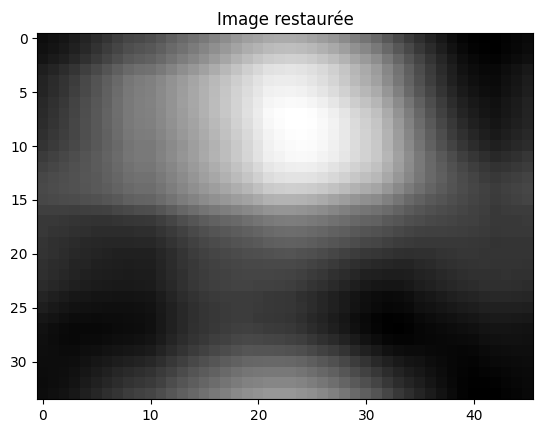

In [23]:
eps = 1e-10 # you can add this to the denominator for stability / vous pouvez ajouter ca au denominateur pour stabilité

padded_size = [y.shape[0] + h.shape[0] - 1, y.shape[1] + h.shape[1] - 1]


Y = np.fft.fft2(y, padded_size)
H = np.fft.fft2(h, padded_size)

H = H / (H + eps)
    
estimate_x = (np.fft.ifft2(Y/H).real)[:y.shape[0], :y.shape[1]]

plt.imshow(estimate_x, cmap='gray')
plt.title("Image restaurée")
    


# Q3. Reproduce the DFT intuition slide (25pt)

Reproduce the slide 15 from lecture 3. First of all generate the same observed signal which is

$$y = \sin(2\omega t) + \sin(5\omega t) + \cos(6\omega t)$$

Use $\omega = 2\pi \frac{f}{f_s}$, and set $f=4$, and $f_s=200$. Then generate a DCT basis matrix $B$ which includes sines with angular frequencies from $\omega$ to $10\omega$, and cosines with angular frequencies from $\omega$ to $10\omega$. Plot $B^\top$ in the same way we do in the slides. (each component on a row). Then, compute the transform $B^\top y$ and visualize with `plt.imshow()`.


# Q3. Reproduire la diapositive d'intuition DFT (25 pt)

Reproduisez la diapositive 15 du cours 3. Tout d'abord, générez le même signal observé qui est

$$y = \sin(2\omega t) + \sin(5\omega t) + \cos(6\omega t)$$

Utilisez $\omega = 2\pi \frac{f}{f_s}$ et définissez $f=4$ et $f_s=200$. Générez ensuite une matrice de base DCT $B$ qui comprend des sinus avec des fréquences angulaires de $\omega$ à 10 $\omega$ et des cosinus avec des fréquences angulaires de $\omega$ à 10 $\omega$. Tracez $B^\top$ de la même manière que nous le faisons dans les diapositives. (chaque composant sur une ligne). Ensuite, calculez la transformation $B^\top y$ et visualizez-le avec `plt.imshow()`



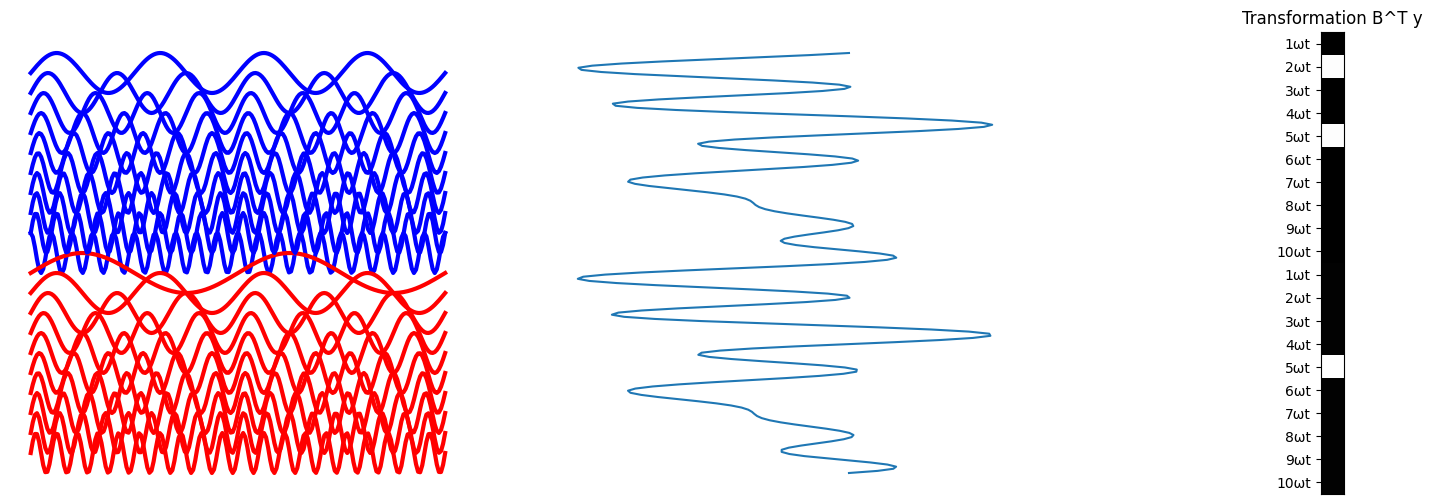

In [37]:
f = 4
fs = 200

w = 2 * np.pi * f 
time= 0.5
t = np.linspace(0, time, fs)
y = np.sin(2 * w * t) + np.sin(5 * w * t) + np.cos(6 * w * t)

N=len(t)
M= 10
B = np.zeros((N, M*2))

B_sin = np.zeros((N, M))
B_cos = np.zeros((N, M))
for i in range(M):
    B_sin[:,i] = np.sin((i + 1) * w *t)
    B_cos[:,M-i-1] = np.cos((i + 1) * w * t)
   
B = np.hstack((B_sin,B_cos))

plt.figure(figsize=(20, 6))

plt.subplot(131)

for i in range(M):
    plt.plot(t, B.T[M-i, :] + i, color='blue', lw=3)
    plt.plot(t, B.T[i, :] - i - 1, color='red', lw=3)
    
plt.axis("off")

plt.subplot(132)

plt.plot(y,t)
plt.axis("off")
plt.subplot(133)

plt.imshow((B.T @ y).reshape(-1,1),cmap='gray')
plt.title("Transformation B^T y")
plt.xticks([])
y_tick_labels =[f'{i+1}ωt' for i in range(M)]
plt.yticks(ticks=np.arange(M*2), labels=y_tick_labels*2)


plt.show()